In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline


# Creating the cluster points  

In [2]:
from sklearn.datasets import make_blobs
X,true_labels=make_blobs(150, centers=3, random_state=42)


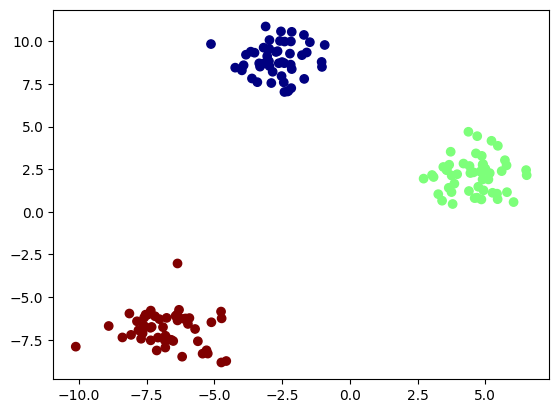

In [3]:
plt.scatter(X[:,0],X[:,1], c=true_labels, cmap='jet')
plt.show()

# K-Means algorithm from scratch

In [4]:
def allot_centroid_points(X, centroid):
    """
    Computes the centroid that should be assigned to every example.
    
    """

    m=X.shape[0]
    k=centroid.shape[0]
    idx=np.zeros(m)

    for i in range(m):
        
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(X[i]-centroid[j]))

        idx[i]=np.argmin(distance)

    return idx

In [5]:
def compute_centroid(X, centroid, idx):
    
    """
    Computes the new centroid point based on the mean of all the bird_small points that is assigned to each centroid.
    """
    m,n=X.shape
    k=centroid.shape[0]
    new_centroid=np.zeros((k,n))

    for i in range(k):
        c=X[idx==i]
        new_centroid[i]=np.mean(c,axis=0)
    return new_centroid

In [6]:
def stopping_condition(centroid, previous_centroid):

    """
    Verifies the stopping condition ie, verifies if the new centroids are different from the previous centroids.
    """

    k=centroid.shape[0]
    if (np.array_equal(previous_centroid,centroid)):
        return True
    return False

In [7]:
def random_initialisation(X,k):
    """
    Function that generates the initial clusters randomly.
    """
    
    random_index=np.random.permutation(X.shape[0])
    centroid=X[random_index[:k]]

    return centroid

In [8]:
def k_plus_plus_initialisation(X,k):
    """
    Function that generates the initial clusters based on k++ algorithm.
    """

    m,n=X.shape
    centroid=np.zeros((k,n))
    random_index=np.random.choice(m)
    centroid[0]=X[random_index]
    for i in range(1,k):
        dist = np.array([min([np.linalg.norm(x - cent)**2 for cent in centroid[:i]]) for x in X])

        probabilities=dist/dist.sum()
        next_index = np.random.choice(m, p=probabilities)
        centroid[i] = X[next_index]

    return centroid

In [9]:
def visualise_clustering(idx, centroid, prev_centroid, name):
    """
    Function to visualise the clusters.
    """

    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=idx,s=20,cmap='jet', alpha=0.7)
    for i in range(prev_centroid.shape[0]):
        plt.scatter(prev_centroid[i, :, 0], prev_centroid[i, :, 1], marker='+', color='b', s=200)
    for i in range(prev_centroid.shape[0]-1):
        for j in range(centroid.shape[0]):
            plt.plot([prev_centroid[i+1][j][0], prev_centroid[i][j][0]], [prev_centroid[i+1][j][1], prev_centroid[i][j][1]], '-.', linewidth=2, c='grey', alpha=0.9)
    plt.scatter(prev_centroid[-1, :, 0], prev_centroid[-1, :, 1], marker='+', color='r', s=200)
    plt.title(name)
    plt.show()

In [10]:
def k_means_algorithm(X, centroid, max_iter=10):
    """
    Function that brings up all the function and iterates till convergence of centroids.
    """
    prev_centroid=np.array([centroid.copy()])
    idx=np.zeros(X.shape[0], dtype=np.int32)
    for i in range(max_iter):
        idx= allot_centroid_points(X, centroid)
        centroid=compute_centroid(X, centroid, idx)
        if (stopping_condition(centroid, prev_centroid[-1])):
            break
        prev_centroid=np.append(prev_centroid,[centroid.copy()], axis=0)
    return idx, prev_centroid, centroid

In [11]:
random_init=[] #List for storing bird_smalls generated using random initial centroids for later visualisation
k_plus_plus_init=[] #List for storing bird_smalls generated using initial centroids based on k_means_plus_plus algorithm for later visualisation
k=3 # number of clusters

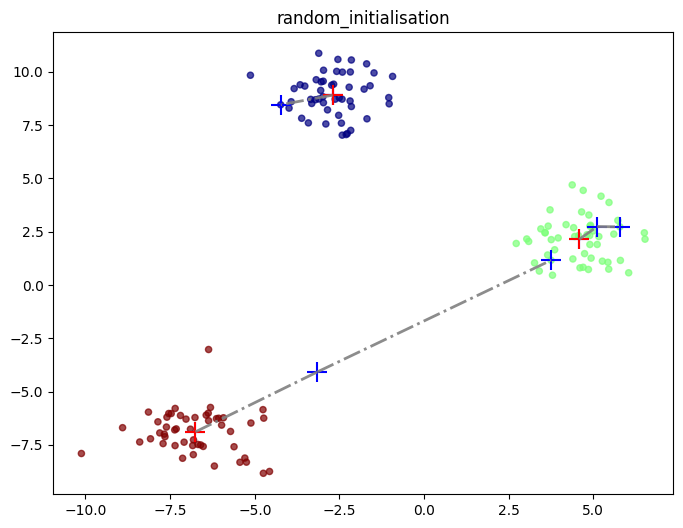

In [12]:
centroid=random_initialisation(X,k)
idx, prev_centroid, centroid=k_means_algorithm(X, centroid)
random_init.append((idx, prev_centroid, centroid))
visualise_clustering(idx, centroid, prev_centroid, 'random_initialisation')

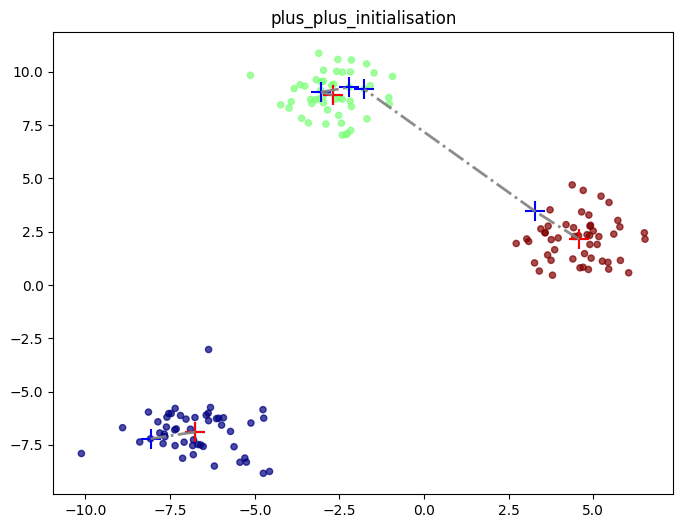

In [13]:
centroid=random_initialisation(X,k)
idx, prev_centroid, centroid=k_means_algorithm(X, centroid)
k_plus_plus_init.append((idx, prev_centroid, centroid))
visualise_clustering(idx, centroid, prev_centroid, 'plus_plus_initialisation')

# Color Compression using K-Means

### Color Compresion for a small bird 

In [14]:
# Reading the image

bird_small = plt.imread('Images/bird_small.png')
bird_small.shape

(128, 128, 3)

In [15]:
# Reshaping the original image to feed into the model

X_bird_small=np.reshape(bird_small, (bird_small.shape[0]*bird_small.shape[1], bird_small.shape[2]))
X_bird_small.shape

(16384, 3)

In [16]:
k=16 # Number of different colors to be present in the compressed image
centroid=k_plus_plus_initialisation(X_bird_small,k)
idx, prev_centroid, centroid=k_means_algorithm(X_bird_small,centroid)

In [17]:
# Processing the output from the algorithm to visualise the image

idx=idx.astype(np.int32)
x_compressed=centroid[idx,:]
image_compressed=np.reshape(x_compressed, bird_small.shape)

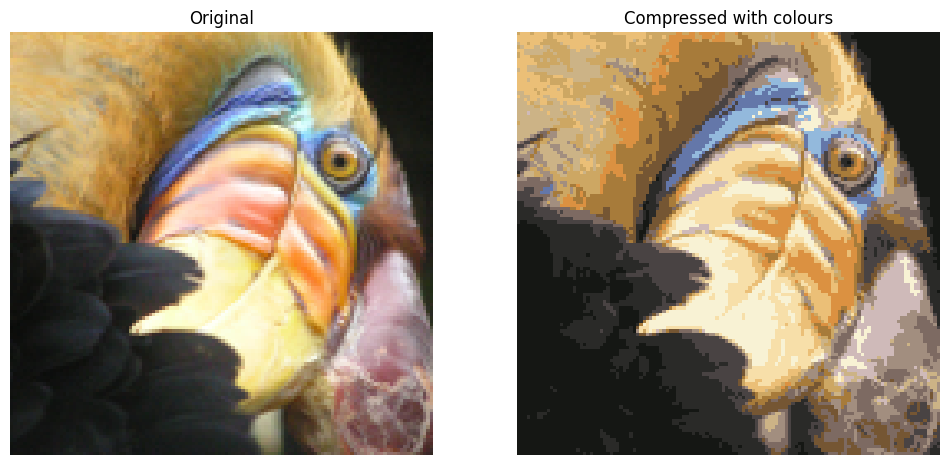

In [18]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(12,10))
plt.axis('off')

ax[0].imshow(bird_small)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(image_compressed)
ax[1].set_title('Compressed with colours')
ax[1].set_axis_off()

### Color compression for a parrot image

In [19]:
# Reading the image

parrot = plt.imread('Images/parrot.jpeg')
parrot.shape

(626, 626, 3)

In [20]:
# Reshaping the original image to feed into the model

X_parrot=np.reshape(parrot, (parrot.shape[0]*parrot.shape[1], parrot.shape[2]))
X_parrot.shape

(391876, 3)

In [21]:
k=5 # Number of different colors to be present in the compressed image

centroid=k_plus_plus_initialisation(X_parrot,k)
idx, prev_centroid, centroid=k_means_algorithm(X_parrot,centroid)

In [22]:
# Processing the output from the algorithm to visualise the image

idx=idx.astype(np.int32)
x_compressed=centroid[idx,:]
image_compressed=np.reshape(x_compressed, parrot.shape)

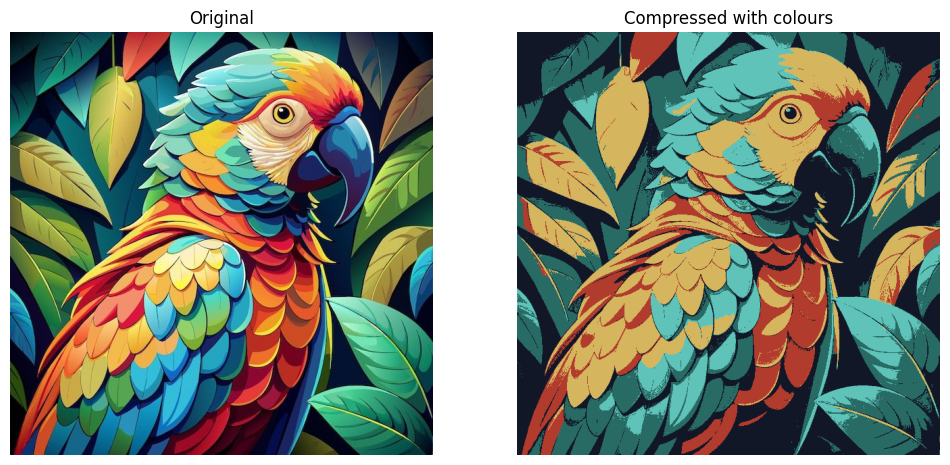

In [23]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(12,10))
plt.axis('off')

ax[0].imshow(parrot)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(image_compressed/255)
ax[1].set_title('Compressed with colours')
ax[1].set_axis_off()

### Color compression for an art

In [24]:
# Reading the image

art = plt.imread('Images/art.jpeg')
art.shape

(426, 640, 3)

In [25]:
# Reshaping the original image to feed into the model

X_art=np.reshape(art, (art.shape[0]*art.shape[1], art.shape[2]))
X_art.shape

(272640, 3)

In [26]:
k=5 # Number of different colors to be present in the compressed image

centroid=k_plus_plus_initialisation(X_art,k)
idx, prev_centroid, centroid=k_means_algorithm(X_art,centroid)

In [27]:
# Processing the output from the algorithm to visualise the image

idx=idx.astype(np.int32)
x_compressed=centroid[idx,:]
image_compressed=np.reshape(x_compressed, art.shape)

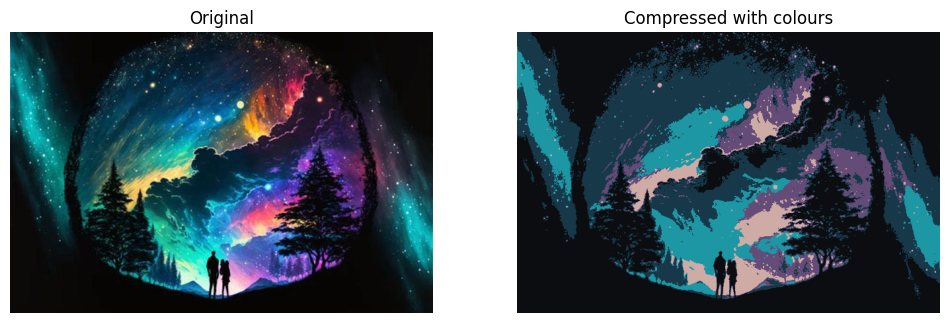

In [28]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(12,10))
plt.axis('off')

ax[0].imshow(art)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(image_compressed/255)
ax[1].set_title('Compressed with colours')
ax[1].set_axis_off()